# KPIer

- Vaccination över tid och påverkan på dödsfall och intensivvård: Minskade dödsfall och svårt sjuka med vaccination?
- Jämförelse av fall i olika kommuner: Var det värst i de största städerna?
- Intensivvård mot dödsfall: Hur effektiv var vården?
- Åldersskillnaden i fall: Var valet att vaccinera äldre först rätt?



## Explorativ analys

Började med en manuell lätt avläsning av de olika excel bladen för att få en idé av vilken data som fanns och vilka KPIer som skulle kunna göra från den.

Bladed vaccinationer tidsserie ger en bild av antalet vaccinationer över tid vilket skulle kunna jämnföras med olika coviddata som dödsfall för att få en idé om hur effektivt vaccinet var. 

Det fanns också olika data från kommuner både kring vaccinationer och fall, möjliga undersökningar som skulle kunna göras är om det var värre i storstäderna mot landsbyggden och om sättet att fördela vacciner var rättvist/effektivt. Intressant sidopunkt att se om det fanns någon kommun som hade många fall men dålig vaccinationsmängd.

Jag hittade också olika intensivvårdsdata som skulle kunna jämföras med dödsfallen för att få en bild av hur effektiv intensivvården var, får göra mer dataanalys för att se om det fanns data för avlidna i vården eller om det enbart går att jämnföra dödsfall.

En till sak att titta på är åldersmätningarna som fanns och hur distributionen där ser ut, om valet att vaccinera äldre först rätt.

## KPI 1: Minskade dödsfall och svårt sjuka med vaccination?

In [513]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


df_timeframe = pd.read_excel("Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name= "Vaccinationer tidsserie")
df_timeframe.head()

,Vecka,År,Region,Antal vaccinationer
0,52,2020,| Sverige |,2478
1,52,2020,Stockholm,289
2,52,2020,Uppsala,9
3,52,2020,Södermanland,116
4,52,2020,Östergötland,214


In [514]:
# Data on number of vaccinations divided into week/year/Region note that region does contain a region representing the whole country
df_timeframe.info()
df_timeframe.value_counts()
df_timeframe["Region"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Vecka                2134 non-null   int64 
 1   År                   2134 non-null   int64 
 2   Region               2134 non-null   object
 3   Antal vaccinationer  2134 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.8+ KB


array(['| Sverige |', 'Stockholm', 'Uppsala', 'Södermanland',
       'Östergötland', 'Jönköping', 'Kronoberg', 'Kalmar', 'Gotland',
       'Blekinge', 'Skåne', 'Halland', 'Västra Götaland', 'Värmland',
       'Örebro', 'Västmanland', 'Dalarna', 'Gävleborg', 'Västernorrland',
       'Jämtland', 'Västerbotten', 'Norrbotten'], dtype=object)

### Notering
Eftersom jag vill jämnföra denna datan men dödsfall i riket och det är per vecka så läser jag in bladed veckodata riket. Jag har redan gjort en dataanalys av detta bladet i uppgift 1 och kommer därför inte göra det här.

In [515]:
# usefull columns år, veckonummer, Antal_nyaintensivvårdade_vecka, Antal_avlidna_vecka
df_cases_country = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Veckodata Riket")
df_cases_country.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [516]:
# cleaning up dataframe so that it only has data needed
df_timeframe = df_timeframe[df_timeframe["Region"] == "| Sverige |"]
df_timeframe["Vecka"] = df_timeframe["År"].astype(str) + "v" + df_timeframe["Vecka"].astype(str)
# could drop "Region" aswell here
df_timeframe.drop("År", axis = 1, inplace=True)
df_timeframe.reset_index(drop=True, inplace= True)
df_timeframe

,Vecka,Region,Antal vaccinationer
0,2020v52,| Sverige |,2478
1,2020v53,| Sverige |,16581
2,2021v1,| Sverige |,53258
3,2021v2,| Sverige |,132915
4,2021v3,| Sverige |,249713
...,...,...,...
92,2022v39,| Sverige |,24260220
93,2022v40,| Sverige |,24469813
94,2022v41,| Sverige |,24641177
95,2022v42,| Sverige |,24778109


In [517]:
# create "vecka" column in dataframe that matches the other dataframes column called "vecka", also drops any data that wont be needed for KPI
df_cases_country["Vecka"] = df_cases_country["år"].astype(str) + "v" + df_cases_country["veckonummer"].astype(str)
df_cases_country.drop(df_cases_country.columns.difference(["Vecka", "Antal_nyaintensivvårdade_vecka", "Antal_avlidna_vecka"]), axis = 1, inplace=True)
df_cases_country

,Antal_nyaintensivvårdade_vecka,Antal_avlidna_vecka,Vecka
0,0,0,2020v6
1,0,0,2020v7
2,0,0,2020v8
3,0,0,2020v9
4,3,0,2020v10
...,...,...,...
138,17,94,2022v39
139,20,98,2022v40
140,15,94,2022v41
141,20,70,2022v42


In [518]:
df = df_timeframe.join(df_cases_country.set_index("Vecka"), on = "Vecka")
df

,Vecka,Region,Antal vaccinationer,Antal_nyaintensivvårdade_vecka,Antal_avlidna_vecka
0,2020v52,| Sverige |,2478,206,643
1,2020v53,| Sverige |,16581,234,663
2,2021v1,| Sverige |,53258,185,644
3,2021v2,| Sverige |,132915,153,598
4,2021v3,| Sverige |,249713,125,513
...,...,...,...,...,...
92,2022v39,| Sverige |,24260220,17,94
93,2022v40,| Sverige |,24469813,20,98
94,2022v41,| Sverige |,24641177,15,94
95,2022v42,| Sverige |,24778109,20,70


In [519]:
fig = px.line(df, x= "Vecka", y=["Antal vaccinationer", "Antal_nyaintensivvårdade_vecka", "Antal_avlidna_vecka"], log_y=True)
fig.show()

#### Noteringar från denna data

Från starten av vaccinationen år 2020 vecka 52 till utplaningen av vaccinationskurvan när de flesta hade vaccinerats år 2021 vecka 27 så finns det en tydlig minskning i antalet dödsfall och intensivvårds fall vilket tyder på att vaccinet hade en effekt mot covid.
Det går även att dra slutsatser kring hur långvarig vaccineffekten är då det kommer en ny våg av dödsfall efter full vaccination. 

## KPI 2: Var det värst i de största städerna?

- vilka kommuner har varit bäst/sämst

In [520]:

df_vaccine_city = pd.read_excel("Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name= "Vaccinerade kommun")
df_vaccine_city.head()

,KnKod,KnNamn,Antal_dos1,Antal_dos2,Andel_dos1,Andel_dos2
0,114,Upplands Väsby,33512,32223,0.808629,0.777526
1,115,Vallentuna,25412,24731,0.864001,0.840847
2,117,Österåker,36303,35248,0.871558,0.846230
3,120,Värmdö,34603,33533,0.870713,0.843789
4,123,Järfälla,57929,55504,0.806462,0.772703


In [521]:
df_vaccine_city.info()
df_vaccine_city["KnNamn"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KnKod       290 non-null    int64  
 1   KnNamn      290 non-null    object 
 2   Antal_dos1  290 non-null    int64  
 3   Antal_dos2  290 non-null    int64  
 4   Andel_dos1  290 non-null    float64
 5   Andel_dos2  290 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 13.7+ KB


array(['Upplands Väsby', 'Vallentuna', 'Österåker', 'Värmdö', 'Järfälla',
       'Ekerö', 'Huddinge', 'Botkyrka', 'Salem', 'Haninge', 'Tyresö',
       'Upplands-Bro', 'Nykvarn', 'Täby', 'Danderyd', 'Sollentuna',
       'Stockholm', 'Södertälje', 'Nacka', 'Sundbyberg', 'Solna',
       'Lidingö', 'Vaxholm', 'Norrtälje', 'Sigtuna', 'Nynäshamn', 'Håbo',
       'Älvkarleby', 'Knivsta', 'Heby', 'Tierp', 'Uppsala', 'Enköping',
       'Östhammar', 'Vingåker', 'Gnesta', 'Nyköping', 'Oxelösund', 'Flen',
       'Katrineholm', 'Eskilstuna', 'Strängnäs', 'Trosa', 'Ödeshög',
       'Ydre', 'Kinda', 'Boxholm', 'Åtvidaberg', 'Finspång',
       'Valdemarsvik', 'Linköping', 'Norrköping', 'Söderköping', 'Motala',
       'Vadstena', 'Mjölby', 'Aneby', 'Gnosjö', 'Mullsjö', 'Habo',
       'Gislaved', 'Vaggeryd', 'Jönköping', 'Nässjö', 'Värnamo', 'Sävsjö',
       'Vetlanda', 'Eksjö', 'Tranås', 'Uppvidinge', 'Lessebo', 'Tingsryd',
       'Alvesta', 'Älmhult', 'Markaryd', 'Växjö', 'Ljungby', 'Högsby',
       '

In [522]:
df_data_city = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Veckodata Kommun_stadsdel")
df_data_city.head()

,år,veckonummer,KnKod,KnNamn,Stadsdel,Kommun_stadsdel,tot_antal_fall_per10000inv,antal_fall_per10000_inv,tot_antal_fall,nya_fall_vecka
0,2020,1,1440,Ale,NaN,Ale,0.0,0.0,0,0
1,2020,2,1440,Ale,NaN,Ale,0.0,0.0,0,0
2,2020,3,1440,Ale,NaN,Ale,0.0,0.0,0,0
3,2020,4,1440,Ale,NaN,Ale,0.0,0.0,0,0
4,2020,5,1440,Ale,NaN,Ale,0.0,0.0,0,0


In [523]:
len(df_data_city["Kommun_stadsdel"].unique())

321

två saker jag noterar här är att det finns kommunkoder för de olika kommunerna vilket är något som skulle kunna användas för sortering. Det andra är att i den ena datan är större kommuner indelade i stadsdelar. Beroende på hur datan ska användas så kan det slås ihop för att få data för hela städer eller ha separat för att få mer exakta mätpunkter.

In [524]:
# dataset 1 contains total vaccine data so need to combine dataset 2 so that it shows total amount instead of weekly count.
# since there is a column for total cases alla i neeed is the last recorded date for every city
df_cases_city = df_data_city[(df_data_city["veckonummer"] == 43) & (df_data_city["år"] == 2022)]
# confirming that i did not miss a city or part
print(len(df_cases_city["Kommun_stadsdel"].unique()))

# cleaning up so that we only have city names and cases per 10000 and total cases
df_cases_city.drop(["år", "veckonummer", "nya_fall_vecka", "antal_fall_per10000_inv"], axis = 1, inplace=True)
df_cases_city = df_cases_city.astype({"tot_antal_fall":"float"})
df_cases_city = df_cases_city.groupby("KnNamn").sum().reset_index()
df_cases_city

321


C:\Users\Rasmus\AppData\Local\Temp\ipykernel_10372\285206726.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rasmus\AppData\Local\Temp\ipykernel_10372\285206726.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,KnNamn,tot_antal_fall_per10000inv,tot_antal_fall
0,Ale,2902.0,9248.0
1,Alingsås,2947.0,12259.0
2,Alvesta,2339.0,4731.0
3,Aneby,2042.0,1393.0
4,Arboga,2559.0,3592.0
...,...,...,...
286,Österåker,2479.0,11561.0
287,Östhammar,1867.0,4155.0
288,Östra Göinge,1807.0,2713.0
289,Överkalix,1849.0,608.0


In [525]:
# join the two data sets to create new dataframe that can be used to plot varius information about cities
df_city = df_cases_city.join(df_vaccine_city.set_index("KnNamn"), on = "KnNamn")
df_city = df_city.sort_values(by="tot_antal_fall", ascending = False).reset_index(drop=True)

# cities with the most cases and least cases
cities_most_cases = df_city.head()
cities_least_cases = df_city.tail()

# dataframe of both most and least cases
drops = []
for i in range(6,286):
    drops.append(i)
most_least_cases = df_city.drop(drops)
most_least_cases

,KnNamn,tot_antal_fall_per10000inv,tot_antal_fall,KnKod,Antal_dos1,Antal_dos2,Andel_dos1,Andel_dos2
0,Stockholm,32806.0,250283.0,180.0,723214.0,697902.0,0.845213,0.815631
1,Göteborg,27445.0,159749.0,1480.0,424776.0,410459.0,0.824638,0.796844
2,Malmö,26307.0,90777.0,1280.0,235558.0,228421.0,0.775768,0.752263
3,Uppsala,2403.0,56195.0,380.0,187401.0,182846.0,0.901742,0.879824
4,Örebro,3456.0,54046.0,1880.0,118738.0,116530.0,0.875055,0.858783
5,Västerås,2889.0,44932.0,1980.0,117906.0,114890.0,0.864908,0.842784
286,Åsele,1665.0,467.0,2463.0,2216.0,2194.0,0.891392,0.882542
287,Arjeplog,1589.0,432.0,2506.0,2180.0,2143.0,0.905316,0.889950
288,Sorsele,1495.0,365.0,2422.0,1905.0,1880.0,0.883171,0.871581
289,Bjurholm,1458.0,348.0,2403.0,1878.0,1860.0,0.898565,0.889952


In [526]:
fig = px.bar(
    most_least_cases,
    y=["tot_antal_fall", "tot_antal_fall_per10000inv"],
    x = "KnNamn",
    barmode="group",
    title="Covid data per Kommun",
    labels={"value":"Antal fall", "KnNamn": "Kommun"}
)
fig.show()

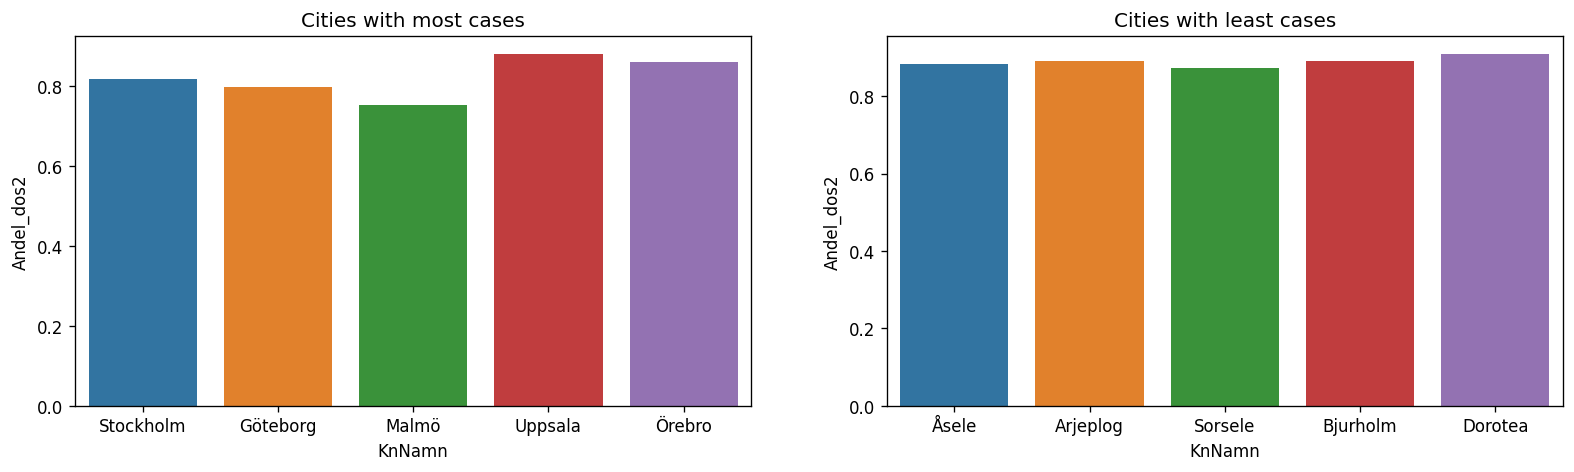

In [527]:
fig, axes = plt.subplots(1, 2, figsize=(16,4), dpi=120)
titles = ["Cities with most cases", "Cities with least cases"]
data_frames = (cities_most_cases, cities_least_cases)

for i,(data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data, x = "KnNamn", y = "Andel_dos2", ax = axes[i])
    axes[i].set(title = title)

#### Noteringar från denna data

Gjorde två olika grafer för att få information kring skillnaderna i större kommuner mot mindre. Första grafen jämför antalet fall i de olika kommunerna och andra grafen kollar andelen som har fått båda doserna vaccin. Som förväntat är det de största städerna som har haft flest fall men det är intressant att notera att även när man delar upp det per 10000 invånare så ligger de mycket högre.
I andra grafen ser vi att det var lite skillnad i vaccinations mängd mellan de med mest fall de med minst men inte stor nog för att vara anmärkningsvärt


## KPI 3: Hur effektiv var vården?

In [528]:
df_deaths = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Antal avlidna per dag")
df_deaths

,Datum_avliden,Antal_avlidna
0,2020-03-11 00:00:00,1
1,2020-03-12 00:00:00,0
2,2020-03-13 00:00:00,1
3,2020-03-14 00:00:00,1
4,2020-03-15 00:00:00,2
...,...,...
963,2022-10-30 00:00:00,2
964,2022-10-31 00:00:00,0
965,2022-11-01 00:00:00,0
966,2022-11-02 00:00:00,0


In [529]:
df_care = pd.read_excel("Folkhalsomyndigheten_Covid19.xlsx", sheet_name= "Antal intensivvårdade per dag")
df_care

,Datum_vårdstart,Antal_intensivvårdade
0,2020-03-06,1
1,2020-03-07,1
2,2020-03-08,1
3,2020-03-09,0
4,2020-03-10,2
...,...,...
967,2022-10-29,3
968,2022-10-30,3
969,2022-10-31,2
970,2022-11-01,0


In [530]:
from datetime import datetime

# changes df_deaths date columns so that it does not display hours
new_date = df_deaths["Datum_avliden"][0:-1]
for i in range(len(new_date)):
   new_date[i] = new_date[i].strftime("%Y-%m-%d")
df_deaths["Datum_avliden"] = pd.Series(new_date)
df_deaths

,Datum_avliden,Antal_avlidna
0,2020-03-11,1
1,2020-03-12,0
2,2020-03-13,1
3,2020-03-14,1
4,2020-03-15,2
...,...,...
963,2022-10-30,2
964,2022-10-31,0
965,2022-11-01,0
966,2022-11-02,0


In [535]:
# Drops NaN and changes name of column to "Datum"
df_deaths.dropna(inplace = True)
df_deaths.rename(columns = {"Datum_avliden": "Datum"}, inplace = True)
df_deaths

,Datum,Antal_avlidna
0,2020-03-11,1
1,2020-03-12,0
2,2020-03-13,1
3,2020-03-14,1
4,2020-03-15,2
...,...,...
962,2022-10-29,7
963,2022-10-30,2
964,2022-10-31,0
965,2022-11-01,0


In [539]:
# Change column typ to object and rename it to "Datum"
df_care["Datum_vårdstart"] = df_care["Datum_vårdstart"].astype(str)
df_care.rename(columns = {"Datum_vårdstart": "Datum"}, inplace = True)
df_care

,Datum,Antal_intensivvårdade
0,2020-03-06,1
1,2020-03-07,1
2,2020-03-08,1
3,2020-03-09,0
4,2020-03-10,2
...,...,...
967,2022-10-29,3
968,2022-10-30,3
969,2022-10-31,2
970,2022-11-01,0


In [542]:
# Creates new dataframe with combined data
df_daily = df_deaths.join(df_care.set_index("Datum"), on = "Datum")
df_daily.info()
df_daily

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967 entries, 0 to 966
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Datum                  967 non-null    object
 1   Antal_avlidna          967 non-null    int64 
 2   Antal_intensivvårdade  967 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 30.2+ KB


,Datum,Antal_avlidna,Antal_intensivvårdade
0,2020-03-11,1,1
1,2020-03-12,0,0
2,2020-03-13,1,2
3,2020-03-14,1,6
4,2020-03-15,2,5
...,...,...,...
962,2022-10-29,7,3
963,2022-10-30,2,3
964,2022-10-31,0,2
965,2022-11-01,0,0


In [546]:
fig = px.line(
    df_daily,
    x="Datum",
    y=["Antal_avlidna", "Antal_intensivvårdade"],
    title="Covid Dödsfall och intensivvård per dag",
    labels={"value": "Antal"},
)
fig.show()


#### Noteringar från denna data

vågorna av dödsfall matchar intensivvården, datan tyder på att majoriteten av intensivvårdade omkomm men vid våren 2021 kan vi se att intensivvård överstiger dödsfall vilket då skulle tyda på att de flesta som blev svårt sjuka klarade sig. Det bör också noteras att en del av de dog aldig hamnade på intensivvård. 

## KPI 4: Åldersskillnaden i fall